# Week 9.
## word cloud!

In [622]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import nltk
from PIL import Image  # to import an image: pillow as PIL
import requests
from nltk.corpus import stopwords
import re

In [623]:
df = pd.read_csv(r'tripadvisor_hotel_reviews.csv', nrows=3000)

In [624]:
df = df.rename(columns=str.lower)

In [625]:
text = df.review[0]  # first persons review

Let's just try making a simple word cloud with the first sentence

In [626]:
wordcloud = WordCloud().generate(text)

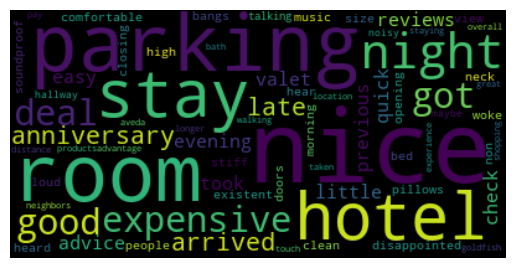

In [627]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # we don't need it, it doesn't really have any meaning to it
plt.show()

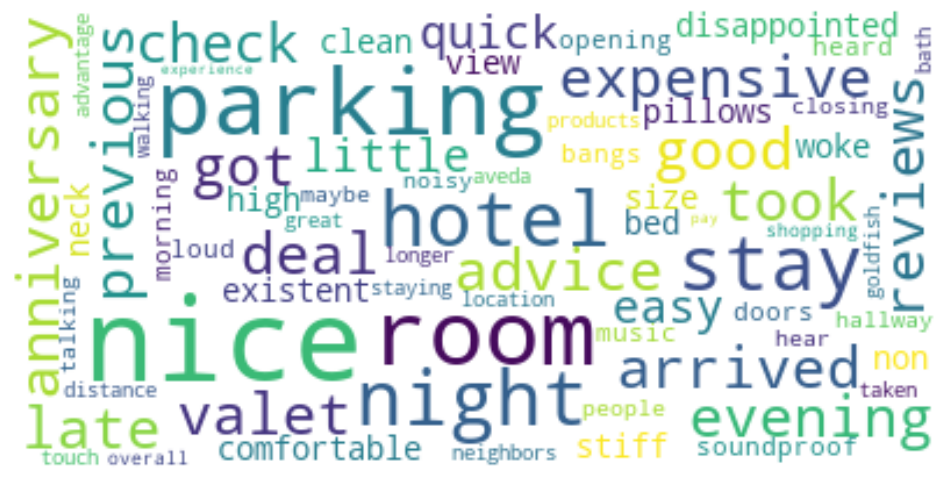

In [628]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Change the size of the figure?

In [629]:
df_2000 = df[:2000]  #only get the first 2000 reviews
df_2000

,review,rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
1995,"best location beach, husband traveled honolulu...",5
1996,awesome place stay outriiger beach great place...,5
1997,"great time, just returned trip stayed 7 nights...",4
1998,best location value properties waikiki head ho...,4


Let's work with our reviews.

Steps!
1. get all texts from review section 
2. combine everything into one big text and 
3. create one cloud to see which words appear the most.


In [630]:
food = ['a', 'b', 'c']
x = " ".join(food)
print(x)

a b c


To get all text from review section and JOIN them into one, we will use join() function.

In [631]:
text = " ".join(review for review in df_2000.review)
text

"nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,   ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unlike 

In [632]:
tokens = nltk.word_tokenize(text)
tokens[:10]

['nice',
 'hotel',
 'expensive',
 'parking',
 'got',
 'good',
 'deal',
 'stay',
 'hotel',
 'anniversary']

In [633]:
new_tokens = [word for word in tokens if word.isalnum()]
len(new_tokens)

164780

In [634]:
pos_tokens = nltk.pos_tag(new_tokens)

In [635]:
pos_tokens[:50]

[('nice', 'JJ'),
 ('hotel', 'NN'),
 ('expensive', 'JJ'),
 ('parking', 'NN'),
 ('got', 'VBD'),
 ('good', 'JJ'),
 ('deal', 'NN'),
 ('stay', 'VB'),
 ('hotel', 'NN'),
 ('anniversary', 'JJ'),
 ('arrived', 'VBD'),
 ('late', 'JJ'),
 ('evening', 'NN'),
 ('took', 'VBD'),
 ('advice', 'RB'),
 ('previous', 'JJ'),
 ('reviews', 'NNS'),
 ('did', 'VBD'),
 ('valet', 'VB'),
 ('parking', 'VBG'),
 ('check', 'VB'),
 ('quick', 'JJ'),
 ('easy', 'JJ'),
 ('little', 'JJ'),
 ('disappointed', 'JJ'),
 ('view', 'NN'),
 ('room', 'NN'),
 ('room', 'NN'),
 ('clean', 'JJ'),
 ('nice', 'JJ'),
 ('size', 'NN'),
 ('bed', 'VBD'),
 ('comfortable', 'JJ'),
 ('woke', 'NN'),
 ('stiff', 'JJ'),
 ('neck', 'RB'),
 ('high', 'JJ'),
 ('pillows', 'NNS'),
 ('not', 'RB'),
 ('soundproof', 'VB'),
 ('like', 'IN'),
 ('heard', 'NN'),
 ('music', 'NN'),
 ('room', 'NN'),
 ('night', 'NN'),
 ('morning', 'NN'),
 ('loud', 'JJ'),
 ('bangs', 'NNS'),
 ('doors', 'NNS'),
 ('opening', 'VBG')]

In [636]:
nouns = []
for word, pos in pos_tokens:
    if pos.startswith("N"):
        nouns.append(word)

nouns[:30]

['hotel',
 'parking',
 'deal',
 'hotel',
 'evening',
 'reviews',
 'view',
 'room',
 'room',
 'size',
 'woke',
 'pillows',
 'heard',
 'music',
 'room',
 'night',
 'morning',
 'bangs',
 'doors',
 'closing',
 'people',
 'neighbors',
 'bath',
 'products',
 'stay',
 'advantage',
 'location',
 'distance',
 'experience',
 'pay']

In [637]:
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

In [638]:
noun_lem = []
for i in nouns:
    noun_lem.append(wnl.lemmatize(i, pos='n'))

In [639]:
noun_lem[:30]

['hotel',
 'parking',
 'deal',
 'hotel',
 'evening',
 'review',
 'view',
 'room',
 'room',
 'size',
 'woke',
 'pillow',
 'heard',
 'music',
 'room',
 'night',
 'morning',
 'bang',
 'door',
 'closing',
 'people',
 'neighbor',
 'bath',
 'product',
 'stay',
 'advantage',
 'location',
 'distance',
 'experience',
 'pay']

In [640]:
verbs = []
for word, pos in pos_tokens:
    if pos.startswith("V"):
        verbs.append(word)

In [641]:
verb_lem = []
for i in verbs:
    verb_lem.append(wnl.lemmatize(i, pos='v'))
verb_lem[:20]

['get',
 'stay',
 'arrive',
 'take',
 'do',
 'valet',
 'park',
 'check',
 'bed',
 'soundproof',
 'open',
 'talk',
 'aveda',
 'do',
 'take',
 'stay',
 'walk',
 'shop',
 'have',
 'decide']

In [642]:
adjectives = []
for word, pos in pos_tokens:
    if pos.startswith("J"):
        adjectives.append(word)

In [643]:
adj_lem = []
for i in adjectives:
    adj_lem.append(wnl.lemmatize(i, pos='a'))
adj_lem[:20]

['nice',
 'expensive',
 'good',
 'anniversary',
 'late',
 'previous',
 'quick',
 'easy',
 'little',
 'disappointed',
 'clean',
 'nice',
 'comfortable',
 'stiff',
 'high',
 'loud',
 'hear',
 'hallway',
 'noisy',
 'goldfish']

In [644]:
freq_nouns = nltk.FreqDist(noun_lem)
freq_nouns.most_common(30)

[('hotel', 4852),
 ('room', 4737),
 ('staff', 1449),
 ('night', 1245),
 ('location', 1229),
 ('time', 927),
 ('place', 916),
 ('service', 872),
 ('stay', 836),
 ('day', 836),
 ('breakfast', 631),
 ('area', 587),
 ('restaurant', 547),
 ('bathroom', 533),
 ('floor', 517),
 ('price', 506),
 ('bed', 499),
 ('street', 499),
 ('desk', 489),
 ('view', 443),
 ('car', 433),
 ('city', 408),
 ('morning', 355),
 ('way', 351),
 ('trip', 350),
 ('people', 347),
 ('block', 342),
 ('food', 335),
 ('thing', 333),
 ('review', 309)]

In [645]:
freq_verbs = nltk.FreqDist(verb_lem)
freq_verbs.most_common(30)

[('stay', 1547),
 ('do', 1164),
 ('get', 586),
 ('walk', 536),
 ('go', 525),
 ('say', 479),
 ('want', 457),
 ('look', 422),
 ('park', 403),
 ('book', 368),
 ('make', 366),
 ('come', 359),
 ('need', 339),
 ('take', 321),
 ('love', 320),
 ('check', 287),
 ('recommend', 283),
 ('leave', 282),
 ('give', 279),
 ('bed', 277),
 ('think', 276),
 ('ask', 273),
 ('arrive', 248),
 ('know', 247),
 ('tell', 239),
 ('expect', 239),
 ('use', 236),
 ('pay', 233),
 ('return', 232),
 ('enjoy', 224)]

In [646]:
freq_adj = nltk.FreqDist(adj_lem)
freq_adj.most_common(30)

[('great', 1907),
 ('good', 1184),
 ('nice', 1048),
 ('small', 738),
 ('clean', 670),
 ('comfortable', 510),
 ('free', 470),
 ('helpful', 466),
 ('little', 459),
 ('new', 416),
 ('stay', 412),
 ('large', 386),
 ('friendly', 368),
 ('excellent', 353),
 ('old', 328),
 ('wonderful', 318),
 ('best', 311),
 ('big', 283),
 ('san', 263),
 ('bad', 261),
 ('quiet', 253),
 ('seattle', 246),
 ('right', 233),
 ('sure', 208),
 ('high', 205),
 ('available', 200),
 ('easy', 198),
 ('perfect', 196),
 ('beautiful', 187),
 ('close', 178)]

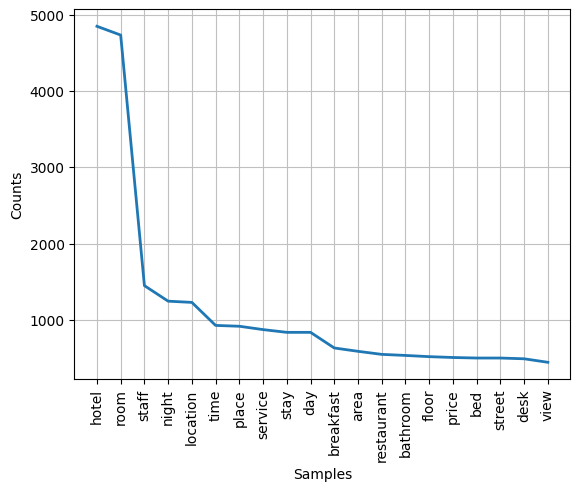

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [647]:
freq_nouns.plot(20)

Ok. we are done with cleaning. <br>
Let's continue with wordcloud

First, we need to set the "frame" of our wordcloud

In [648]:
wc = WordCloud(width=800, height=500, background_color='white')

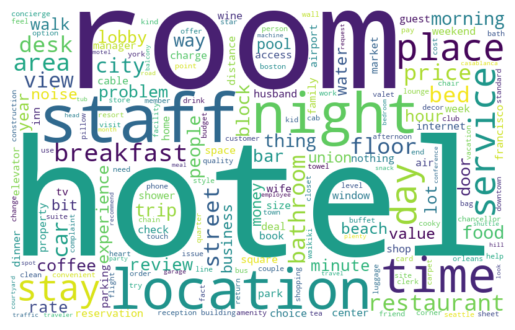

In [649]:
plt.imshow(wc.generate_from_frequencies(freq_nouns), interpolation='bilinear')
plt.axis('off')
plt.show()

In [650]:
wc.to_file('new_nouns.png')

In [651]:
wc = WordCloud(width=800, height=500, min_font_size=8, max_font_size=200, background_color='white', colormap='plasma')

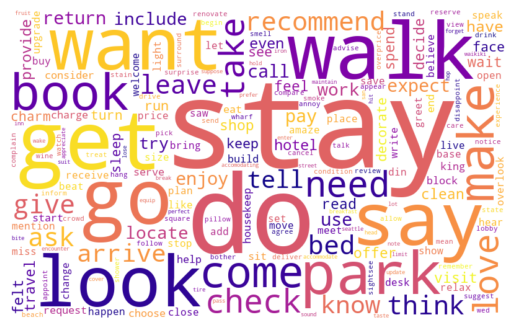

In [652]:
plt.imshow(wc.generate_from_frequencies(freq_verbs), interpolation='bilinear')
plt.axis('off')
plt.show()

In [653]:
wc.to_file('new_verbs.png')

In [654]:
wc = WordCloud(width=800, height=500, min_font_size=8, max_font_size=200, background_color='black', colormap='BuGn')

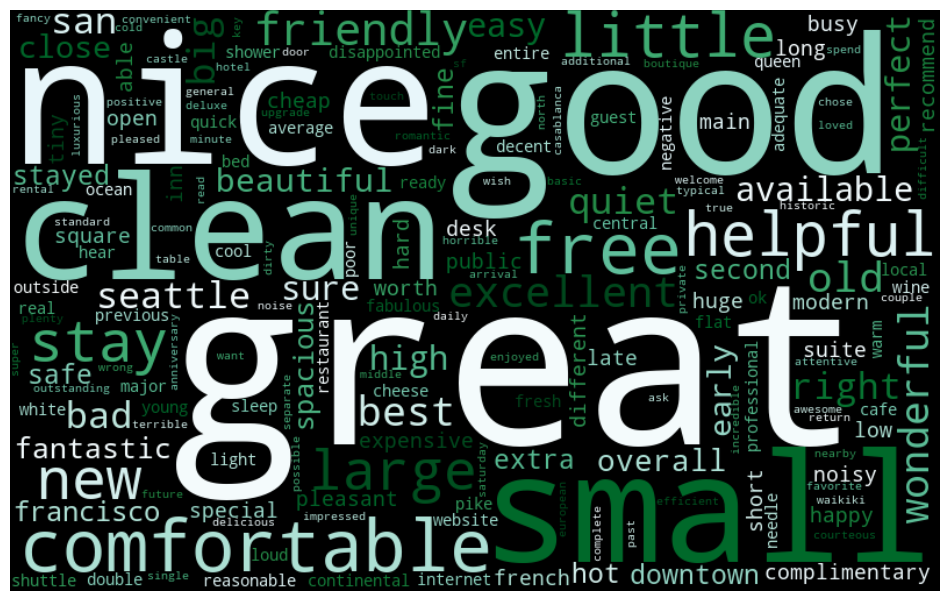

In [655]:
plt.figure(figsize=(12, 10))
plt.imshow(wc.generate_from_frequencies(freq_adj), interpolation='bilinear')
plt.axis('off')
plt.show()

In [656]:
wc.to_file('new_adjectives.png')

Ok.I do not like square shape. <br>
Let's change the square to other ones.

In [657]:
upvote_pic = np.array(Image.open('upvote.png'))

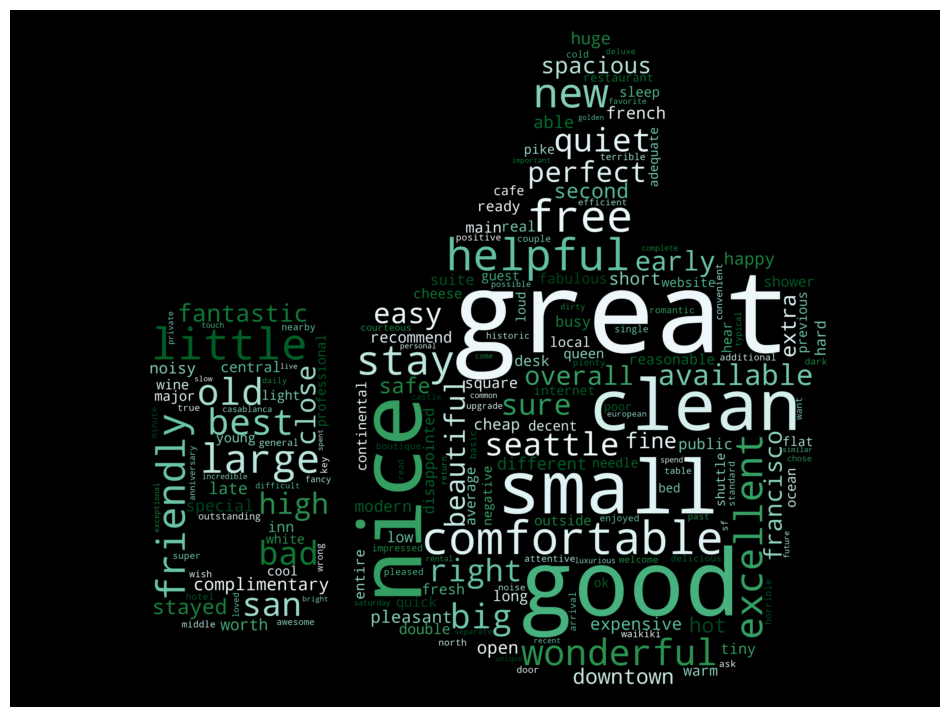

In [658]:
wc = WordCloud(mask=upvote_pic, width=800, height=500, min_font_size=8, max_font_size=500, background_color='black', colormap='BuGn')
plt.figure(figsize=(12, 10))
plt.imshow(wc.generate_from_frequencies(freq_adj), interpolation='bilinear')
plt.axis('off')
wc.to_file('new_adj.png')

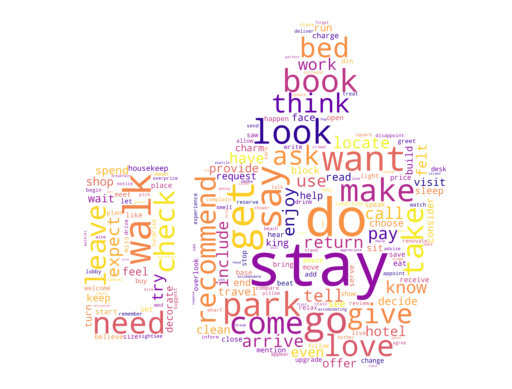

In [659]:
wc = WordCloud(mask=upvote_pic, width=800, height=500, min_font_size=8, max_font_size=500, background_color='white', colormap='plasma')
plt.imshow(wc.generate_from_frequencies(freq_verbs), interpolation='bilinear')
plt.axis('off')
wc.to_file('new_verbs.png')

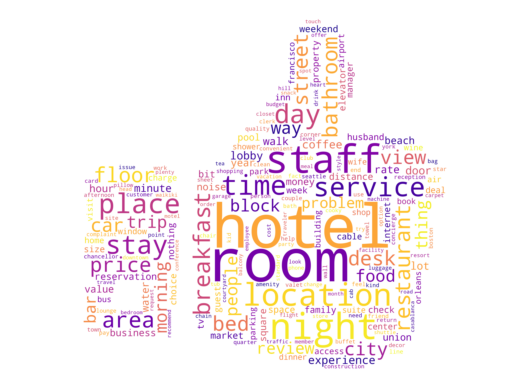

In [660]:
wc = WordCloud(mask=upvote_pic, width=800, height=500, min_font_size=8, max_font_size=500, background_color='white', colormap='plasma')
plt.imshow(wc.generate_from_frequencies(freq_nouns), interpolation='bilinear')
plt.axis('off')
plt.show()
wc.to_file('new_nouns.png')

What if I want to apply the same color of the image ?<br>
We can generate color from images

In [661]:
bed_pic = np.array(Image.open('bed.jpg'))

In [662]:
image_colors = ImageColorGenerator(bed_pic)

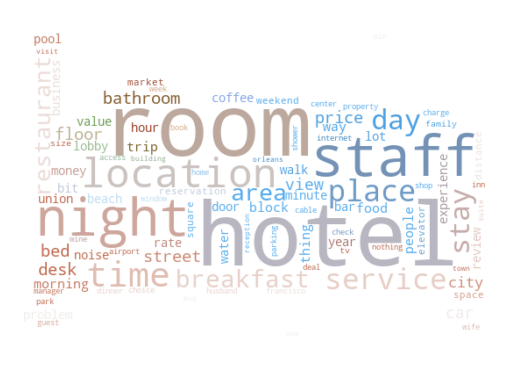

In [663]:
wc = WordCloud(mask=bed_pic, width=800, height=500, min_font_size=8, max_font_size=100, background_color='white', color_func=image_colors)
plt.imshow(wc.generate_from_frequencies(freq_nouns), interpolation='bilinear')
plt.axis('off')
plt.show()
wc.to_file('bed_new_nouns.png')